In [110]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab_Notebooks

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab_Notebooks


In [111]:
%cd coursera-deep-learning-specialization-master/C1-NeuralNetworksandDeepLearning/Week\ 3/Planar\ data\ classification\ with\ one\ hidden\ layer

/content/drive/My Drive/Colab_Notebooks/coursera-deep-learning-specialization-master/C1-NeuralNetworksandDeepLearning/Week 3/Planar data classification with one hidden layer


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset,load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [113]:
X, Y = load_planar_dataset()

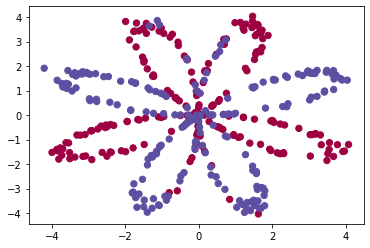

In [114]:
plt.scatter(X[0,:],X[1,:], c=Y, s=40, cmap=plt.cm.Spectral)

In [115]:
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


## functions

### layer size

In [116]:
def layer_size(X, Y):
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]
  return n_x, n_h, n_y

### Parameter initilization



In [117]:
def initialize_parameters(n_x, n_h, n_y):
  np.random.seed(2)
  
  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))

  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}

  return parameters

### Forward propagation

In [118]:
def forward_propagation(X, parameters):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1,X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)

  assert(A2.shape == (1, X.shape[1]))

  cache = {"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2}

  return A2, cache

### Cost computation

In [119]:
def compute_cost(A2, Y, parameters):
  m = Y.shape[1]
  #cost = -1/m * (np.dot(Y,np.log(A2).T) + np.dot((1-Y),np.log(1-A2).T))
  logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
  cost = -1/m * np.sum(logprobs)
  cost = float(np.squeeze(cost))
  assert(isinstance(cost, float))
  return cost

### Back propagation

In [120]:
def backward_propagation(parameters, cache, X, Y):
  m = X.shape[1]

  W1 = parameters["W1"]
  W2 = parameters["W2"]

  A1 = cache["A1"]
  A2 = cache["A2"]

  dZ2 = A2 - Y
  dW2 = 1/m*np.dot(dZ2, A1.T)
  db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
  dW1 = 1/m*np.dot(dZ1, X.T)
  db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)

  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}
  
  return grads

## Parameters update

In [121]:
def update_parameters(parameters, grads, learning_rate = 1.2):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2#
  
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
  
  return parameters

# **NN_Model**

In [122]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  
  np.random.seed(3)
  n_x = layer_size(X, Y)[0]
  n_y = layer_size(X, Y)[2]

  parameters = initialize_parameters(n_x, n_h, n_y)

  for i in range(0,num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost = compute_cost(A2, Y, parameters)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))

  return parameters

In [123]:
def predict(parameters, X):
  A2, cache = forward_propagation(X, parameters)
  predictions = (A2 > 0.5)
  return predictions

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219467
Cost after iteration 9000: 0.218561


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

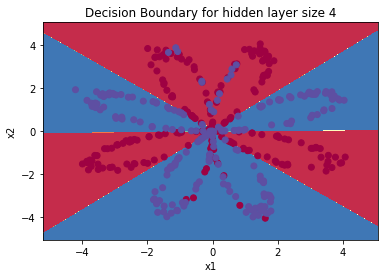

In [124]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [125]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


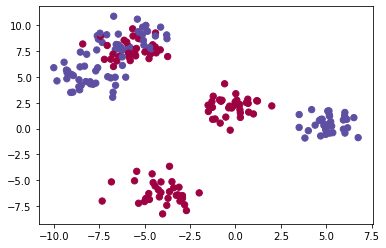

In [136]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "blobs"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);



Cost after iteration 0: 0.693527
Cost after iteration 1000: 0.323911
Cost after iteration 2000: 0.323194
Cost after iteration 3000: 0.323030
Cost after iteration 4000: 0.322847
Cost after iteration 5000: 0.322807
Cost after iteration 6000: 0.322780
Cost after iteration 7000: 0.322730
Cost after iteration 8000: 0.322728
Cost after iteration 9000: 0.322706


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

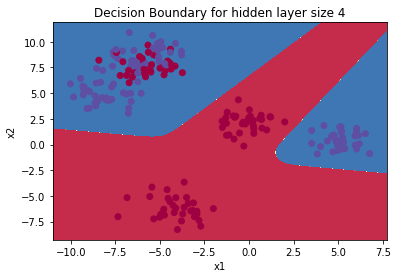

In [137]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))